# Perceptron demo

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from perceptron import gen_data, set_limits, init_plot, calc_normal

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def demo(m=20, alpha=0.5, loops=10):
    """Run a demo of training a perceptron.
    
    Parameters
    ----------
    m : int
        Number of datapoints per class
    alpha : float
        Initial learning rate
    loops : int
        Number of times to go through the data
        
    """
    # generate some random data
    x, y = gen_data(m)
        
    # initialize helper variables
    X = np.concatenate([x, np.ones((2 * m, 1))], axis=1)
    errors = np.empty(loops * y.size)

    # set up our initial weights and normal vectors
    w = np.array([0, 0.2, 0])
    normal, boundary = calc_normal(np.random.randn(2), w)

    # initialize the plot
    update_plot = init_plot(x, y, boundary, loops)

    for i in range(loops):
        # update the learning rate
        alpha = alpha * 0.5

        for j in range(y.size):
            # number of iterations so far
            k = i * y.size + j
            
            # compute the output of the perceptron and the error to the true labels
            output = sigmoid(np.dot(w, X.T))
            errors[k] = ((y - output) ** 2).sum()
            
            # update our weights and recalculate the normal vector
            w += alpha * (y[j] - output[j]) * output[j] * (1 - output[j]) * X[j]
            normal, boundary = calc_normal(normal, w)

            # update the plot
            update_plot(errors[:k], boundary)

<IPython.core.display.Javascript object>


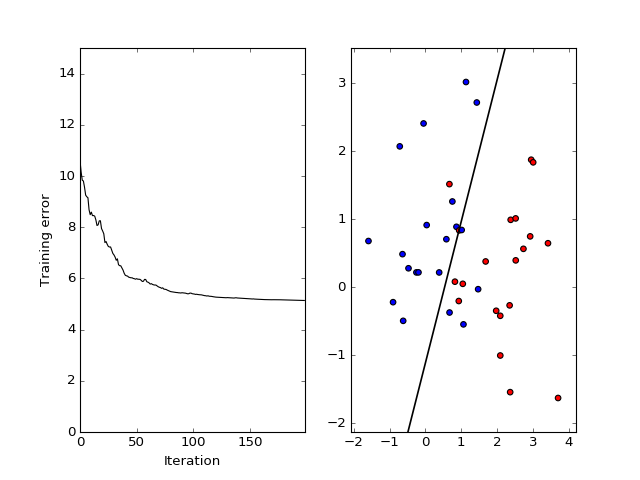

In [4]:
demo(loops=5)